In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import gaussian
from skimage.feature import canny

In [2]:
img1 = gaussian(imread('imgs/bw1.jpg'))
img2 = gaussian(imread('imgs/bw2.jpg'))

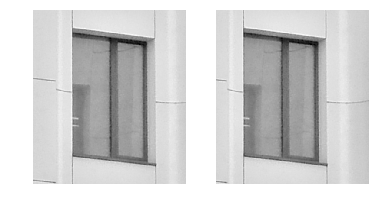

In [3]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img1, cmap='gray')
axs[0].axis('off')
axs[1].imshow(img2, cmap='gray')
axs[1].axis('off')
plt.show()

In [4]:
eimg1 = canny(img1, sigma=2).astype(np.int)
eimg2 = canny(img2, sigma=2).astype(np.int)

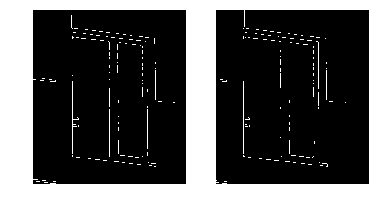

In [5]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(eimg1, cmap='gray')
axs[0].axis('off')
axs[1].imshow(eimg2, cmap='gray')
axs[1].axis('off')
plt.show()

In [6]:
e1 = np.argwhere(eimg1 == 1)
e1x = e1[:, 0]
e1y = e1[:, 1]
e2 = np.argwhere(eimg2 == 1)
e2x = e2[:, 0]
e2y = e2[:, 1]

In [7]:
dtimg1 = np.zeros_like(eimg1)
for i in range(eimg1.shape[0]):
    for j in range(eimg1.shape[1]):
        d = np.sqrt(np.square(e1x - i) + np.square(e1y - j))
        dtimg1[i, j] = d.min()
        #print(d.shape)
        #break
    #break

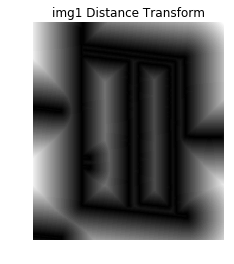

In [8]:
#plt.imshow(np.invert(dtimg1), cmap='gray')
plt.imshow(dtimg1, cmap='gray')
plt.axis('off')
#plt.title('img1 Distance Transform (inverted)')
plt.title('img1 Distance Transform')
plt.show()

In [9]:
# Hausdorff distance
hd = 0
dstnc = []
for i in range(e1.shape[0]):
    d = np.sqrt(np.square(e1x[i] - e2x) + np.square(e1y[i] - e2y))
    dstnc.append(d.min())
print(max(dstnc))

28.0


In [10]:
def hausdorff_distance2d(a, b):
    ax, ay = a[:, 0], a[:, 1]
    bx, by = b[:, 0], b[:, 1]
    ds = []
    for i in range(a.shape[0]):
        d = np.sqrt(np.square(ax[i] - bx) + np.square(ay[i] - by))
        ds.append(d.min())
    return np.max(ds)

#hausdorff_distance2d(e1, e2)

In [11]:
# for 2d displacement

N = 25
HALF_N = N // 2
wf = np.zeros([N, N])
progress = 0
for i in range(-HALF_N, HALF_N):
    for j in range(-HALF_N, HALF_N):
        v = hausdorff_distance2d(e1, e2 + [[i, j]])
        wf[i+HALF_N, j+HALF_N] = v
        progress += 1
        print('\r{0:3.0f} %'.format(100*(progress/N**2)), end='', flush=True)


 92 %

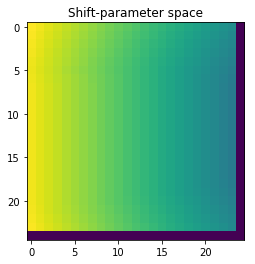

In [12]:
plt.imshow(wf)
plt.title('Shift-parameter space')
plt.show()

In [13]:
shift = np.argwhere(wf == wf.min())[0]
print(shift)
if shift[0] < HALF_N:
    shift[0] -= HALF_N
if shift[1] < HALF_N:
    shift[1] -= HALF_N
print(shift)

[ 0 24]
[-12  24]


In [14]:
te2x, te2y = np.clip(e2x + shift[0], 0, img2.shape[0]-1), np.clip(e2y + shift[1], 0, img2.shape[1]-1)

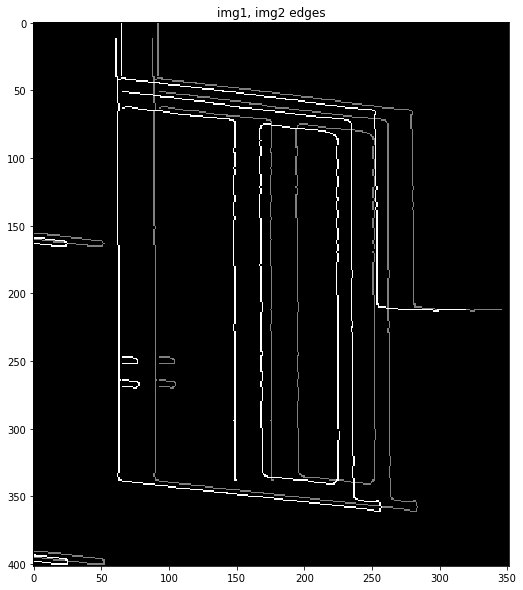

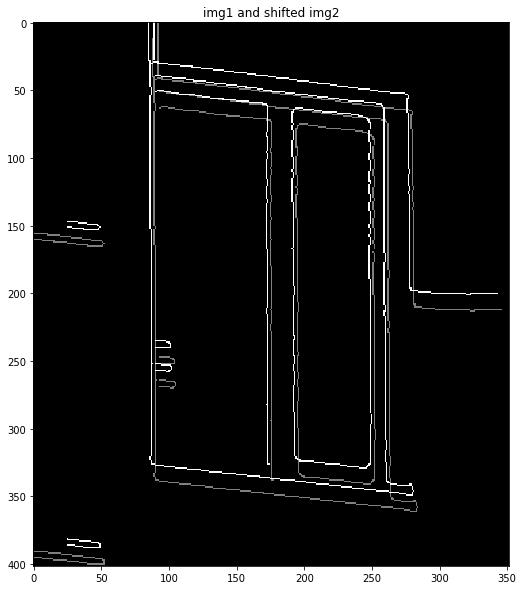

In [15]:
erimg = np.zeros_like(img1)
erimg[e1x, e1y] = 1
erimg[e2x, e2y] = 2
#erimg[te2x, te2y] = 3 # shifted edges

plt.figure(figsize=(10,10))
plt.title('img1, img2 edges')
plt.imshow(erimg, cmap='gray')
plt.show()

erimg = np.zeros_like(img1)
erimg[e1x, e1y] = 1
erimg[te2x, te2y] = 2 # shifted edges

plt.figure(figsize=(10,10))
plt.title('img1 and shifted img2')
plt.imshow(erimg, cmap='gray')
plt.show()